# Student Performance Dataset

## Table of Contents

1. [Introduction](#intro)
2. [EDA](#eda)
    1. [Extracurricular Activities](#extra)
    2. [Study Time](#study)
    3. [Romantic Relationships](#romantic)
    4. [Free Time and Time Spent with Friends](#free)
3. [Summary](#summary)

## Introduction <a name="intro">
    
Student Performance Data was obtained in a survey of students' math course in two Portugese secondary schools. A download of the data set can be found at https://www.kaggle.com/datasets/devansodariya/student-performance-data?resource=download
    
The target variable in the dataframe is "G3". This is the final grade scored from 0 to 20. We would like to determine how a student's time spent outside of class and support outside of class impact their over al grade. Some questions that may be relavent are: 
    
* How do extracurricular activites impact grade?
* What is the most effective amount of study time?
* How much time is spent with friends?
* Do romantic relationships impact final grade?
* How much free time should students have?
    

## EDA<a name="eda">

In [25]:
#load packages

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
student_df = pd.read_csv("archive/student_data.csv")
student_df.shape

(395, 33)

In [3]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [32]:
final_mean = student_df.G3.mean()
final_min = student_df.G3.min()
final_max = student_df.G3.max()
print(f"The average final grade is {final_mean: .1f}")
print(f"The maximum final grade is {final_min: .1f}")
print(f"The minimum final grade is {final_max: .1f}")

The average final grade is  10.4
The maximum final grade is  0.0
The minimum final grade is  20.0


(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

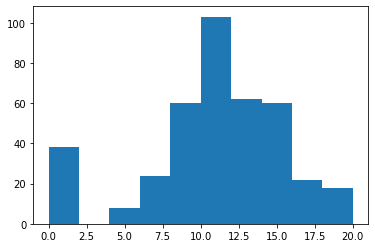

In [33]:
plt.hist(student_df.G3)

**We can see the target variable has a nice mound shape centered around 10.4. The exception is the 38 students that received zero. This accounts for 9.6% of the surveyed students and is a significant amount.**

In [9]:
student_num_df = student_df.select_dtypes(include=['int64'])

In [10]:
corr = student_num_df.corr()

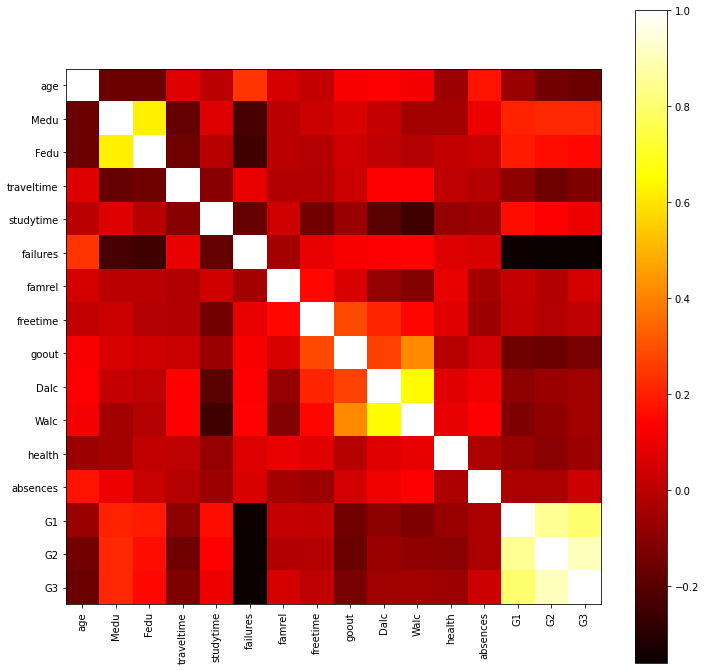

In [13]:
plt.figure(figsize=(12, 12))

plt.xticks(range(len(student_num_df.columns)), student_num_df.columns, rotation = 90)
plt.yticks(range(len(student_num_df.columns)), student_num_df.columns)

hm = plt.imshow(corr, cmap='hot')
plt.colorbar(hm)

**We can see that from the numerical data, mother's education, father's education, studytime, and failures have the stongest correlations.
This does not include G1 and G2 because those are first and second period grades which have an obvious correlation with G3** 

### Extracurricular Activities<a name='extra'>

This feature shows whether or not a student engages in extracurriculars.

<AxesSubplot:xlabel='activities', ylabel='count'>

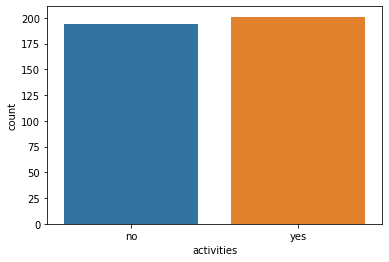

In [27]:
sns.countplot(x='activities', data=student_df)

In [41]:
student_df['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities', ylabel='G3'>

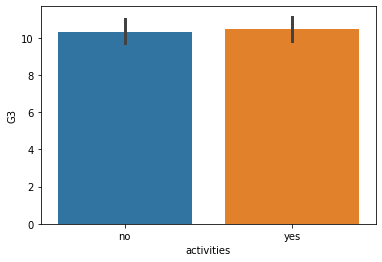

In [35]:
sns.barplot(x='activities', y='G3', data=student_df, errwidth=3)

**From the barplot above, engaging in extra curricular activies does not seem to have any large impact on the target variable**

### Study Time<a name='study'>

The 'studytime' categories represent weekly hours spent studying.\
One - less than two hours\
Two - two to five hours\
Three - five to ten hours\
Four - more than ten hours

<AxesSubplot:xlabel='studytime', ylabel='count'>

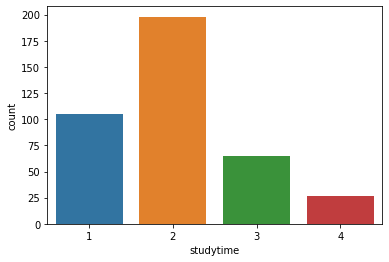

In [42]:
sns.countplot(x='studytime', data=student_df)

<AxesSubplot:xlabel='studytime', ylabel='G3'>

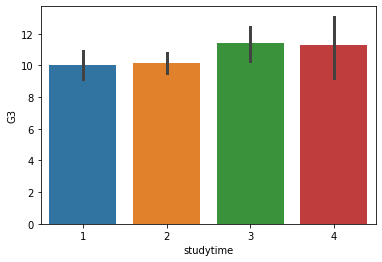

In [43]:
sns.barplot(x='studytime', y='G3', data=student_df, errwidth=3)

**Overall, because our error bars overlap, study time does not seem to be a major predictor to average final grade. However, students that received the highest grades typically study five or more hours per week. So, studying five or more hours would be advisable. The largest variablility were in students that studied more than ten hours per week.**

### Romantic Relationships<a name='romantic'>

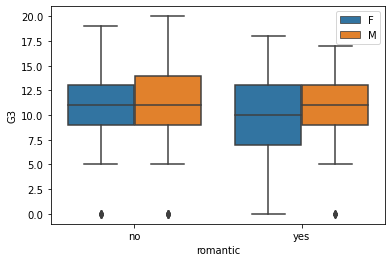

In [46]:
sns.boxplot(x = 'romantic', y = 'G3', hue = 'sex', data=student_df)
plt.legend(loc='upper right')

**From the boxplot above, we can see that, with few outliers, being in a romantic relationship has little impact on the average final grade. We can note, however, that the students with the highest scores were not in a relationship. Also, among students in a relationship, girls were affected more; slightly lower average and larger grade variability**

### Free Time and Time Spent with Friends<a name='free'>

The scale for both these features is from one to five, where one is very low and five is very high. Because this is a Likert scale, it equates more to how much time a students feels they spend and not an actual quantity of time.

Text(0.5, 1.0, 'Time with Friends')

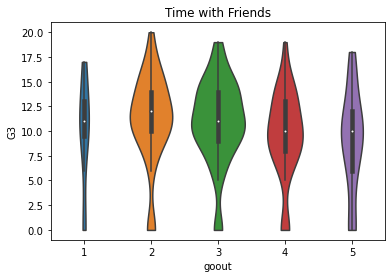

In [52]:
sns.violinplot(x = 'goout', y = 'G3', data=student_df, cut = 0, scale='count')
plt.title('Time with Friends')

Text(0.5, 1.0, 'Free Time after School')

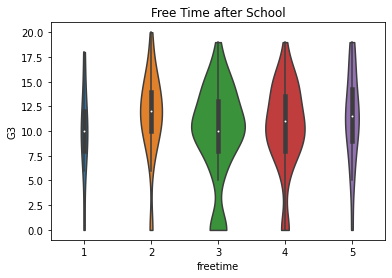

In [54]:
sns.violinplot(x = 'freetime', y = 'G3', data=student_df, cut = 0, scale='count')
plt.title('Free Time after School')

**The majority of students have a moderate amount of free time. For the most part, whether or not a student spends their time with friends has little impact on overall average. The distributions for each category are very similar. We can see however, a possible trend with the amount of time spent with friends. As a student spends more time with friends their grades begin to slip. In either case, level two has the best results overall, and it is advisable that a student somewhat limit their free time with or without friends. Also, it appears that some free time is better than no free time.**

## Summary <a name='summary'>

From the survey data, we can conlude that the time spent outside of school is a poor indicator of overall math scores. The correlation heatmap shows that the family likely has more impact. Further study on the parents' education, jobs, and family support may provide more insight.\
If a recomendation to the student were to be made however, it is not suprising that more time studying, avoiding romantic relationships, and limiting free time may result in better, scores even if only slightly.